![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [33]:
# Bibliotecas para Classificação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carregando dados
df = pd.read_csv('https://raw.githubusercontent.com/EloizioHMD/br-classification-project/master/Churn_Modelling.csv', sep=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Verificar valores faltantes
pd.DataFrame(data = [df.isna().sum()/df.shape[0]*100], index=['Qtd. NA (%)'])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Qtd. NA (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
pd.DataFrame(data = [df.isnull().sum()/df.shape[0]*100], index=['Qtd. Null (%)'])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Qtd. Null (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Transformação de dados para novas features
df_trans = df.iloc[:,3:]
df_trans.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Criando Feature para Gender
def Gender_to_numeric(x):
  if x=='Female': return 2
  if x=='Male': return 1

df_trans['Gender_num'] = df_trans['Gender'].apply(Gender_to_numeric)
df_trans.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_num
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,2


In [10]:
# Criando Feature para Geography
df_trans['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
# Criando Feature para Geography
def Geo_to_numeric(x):
  if x=='France': return 3
  if x=='Spain': return 2
  if x=='Germany': return 1

df_trans['Geocode'] = df_trans['Geography'].apply(Geo_to_numeric)
df_trans.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_num,Geocode
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,3
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2,3
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2,3
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,2


In [12]:
# Análise de variáveis importantes
df_trans.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_num,Geocode
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,1.454300,2.250500
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.830433
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,1.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,1.000000,1.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,3.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,2.000000,3.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000,3.000000


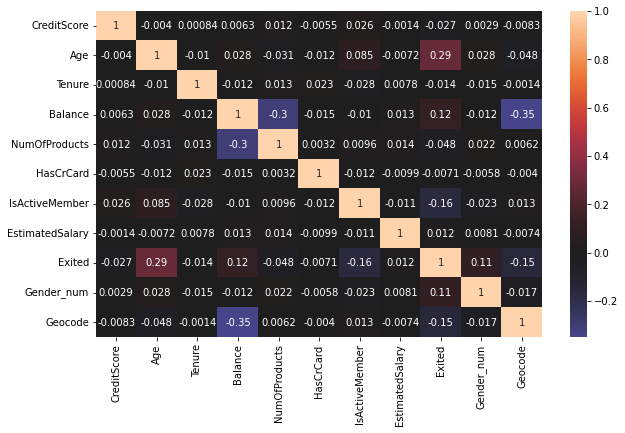

In [13]:
# Dataviz de correlação dos dados
plt.figure(figsize=(10,6))
sns.heatmap(data=df_trans.corr(), annot=True, center=0);

### 3.2 Preparação e limpeza dos dados

Os dados foram entregues limpos, como vimos na análise exploratória. Não sendo necessário qualquer interferência neste sentido.

Contudo, anteriormente, algumas preparações foram feitas para incluir novas fetures e incluindo ao dicionário as seguintes:

- **Gender_num**: (1) masculino e (2) feminimo.
- **Geocode**: (1) Germany, (2) Spain e (3) France.

### 3.3 Seleção de atributos

In [76]:
# Variáveis que melhor correlacionaram com o target e entre sí
X = df_trans[['Age', 'Balance', 'Gender_num', 'EstimatedSalary', 'Geocode', 'NumOfProducts']]

In [77]:
y = df_trans[['Exited']]

In [78]:
X.shape, y.shape

((10000, 6), (10000, 1))

### 3.4 Construção do modelo

In [44]:
#!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
# Bibliotecas para modelos
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [79]:
Seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=Seed)

In [80]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape,

((2500, 6), (2500, 1), (7500, 6), (7500, 1))

### 3.5 Avaliação do modelo

In [82]:
# Classificação pelo Lazy
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:14<00:00,  2.05it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.86,0.72,0.72,0.85,0.18
KNeighborsClassifier,0.85,0.71,0.71,0.84,0.14
RandomForestClassifier,0.85,0.71,0.71,0.84,0.93
BaggingClassifier,0.85,0.70,0.70,0.84,0.20
ExtraTreesClassifier,0.84,0.70,0.70,0.83,0.63
XGBClassifier,0.86,0.70,0.70,0.84,0.34
LabelSpreading,0.83,0.70,0.70,0.83,4.11
AdaBoostClassifier,0.85,0.70,0.70,0.84,0.35
LabelPropagation,0.83,0.69,0.69,0.82,2.59


## 4. Conclusão

Das diversas tentativas e melhoria nas features extraímos qualidade de diversos modelos. Foram testados 29 modelos de classificação, cada qual com sua vantagem e desvantagem, sendo LGBMClassifier, KNeighborsClassifier e RandomForestClassifier os três melhores avalíados.